# Day 24
## Author: Sergio Esteban Tarrero
### Source: https://rshiny.ilo.org/dataexplorer12/?lang=en&segment=indicator&id=EAP_DWAP_SEX_AGE_RT_A&ref_area=DZA&_gl=1*cyzbik*_ga*MTYwMjAzOTMzMi4xNzE1MjA0Mjcy*_ga_1MGT4WT12L*MTcxNTIwNjc1OS4yLjEuMTcxNTIwNjg2NS42MC4wLjA.

In [173]:
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
df = pd.read_csv('EAP_DWAP_SEX_AGE_RT_A-full-2024-05-09.csv')

In [175]:
df.head(4)

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Aruba,Labour force participation rate by sex and age...,LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 15+",2011,63.8,NaN,NaN,NaN,NaN
1,Aruba,Labour force participation rate by sex and age...,LFS - Labour Force Survey,Sex: Male,"Age (Youth, adults): 15+",2011,69.6,NaN,NaN,NaN,NaN
2,Aruba,Labour force participation rate by sex and age...,LFS - Labour Force Survey,Sex: Female,"Age (Youth, adults): 15+",2011,58.8,NaN,NaN,NaN,NaN
3,Aruba,Labour force participation rate by sex and age...,LFS - Labour Force Survey,Sex: Total,Age (Aggregate bands): Total,2011,63.8,NaN,NaN,NaN,NaN


In [176]:
df.shape

(330991, 11)

In [177]:
broad_age_groups = ['Age (Aggregate bands): <15', 'Age (Youth, adults): 15+', 'Age (Youth, adults): 15-64']
filtered_data = df[df['classif1.label'].isin(broad_age_groups)]
filtered_data.head()

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Aruba,Labour force participation rate by sex and age...,LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 15+",2011,63.80,NaN,NaN,NaN,NaN
1,Aruba,Labour force participation rate by sex and age...,LFS - Labour Force Survey,Sex: Male,"Age (Youth, adults): 15+",2011,69.60,NaN,NaN,NaN,NaN
2,Aruba,Labour force participation rate by sex and age...,LFS - Labour Force Survey,Sex: Female,"Age (Youth, adults): 15+",2011,58.80,NaN,NaN,NaN,NaN
30,Aruba,Labour force participation rate by sex and age...,LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 15+",2007,66.20,NaN,NaN,NaN,Data reference period: October | Population co...
31,Aruba,Labour force participation rate by sex and age...,LFS - Labour Force Survey,Sex: Total,"Age (Youth, adults): 15-64",2007,73.76,NaN,NaN,NaN,Data reference period: October | Population co...


In [178]:
pivot_data = filtered_data.pivot_table(values='obs_value', index='time', columns='classif1.label', aggfunc='mean')
pivot_data

classif1.label,Age (Aggregate bands): <15,"Age (Youth, adults): 15+","Age (Youth, adults): 15-64"
time,,,
1946,NaN,44.586667,NaN
1947,NaN,51.634000,59.346667
1948,NaN,59.366667,63.022333
1949,NaN,59.466667,63.251333
1950,3.096667,64.493778,68.351636
...,...,...,...
2019,NaN,61.330809,68.522719
2020,2.323333,60.932353,68.769765
2021,2.953333,60.549712,68.521228


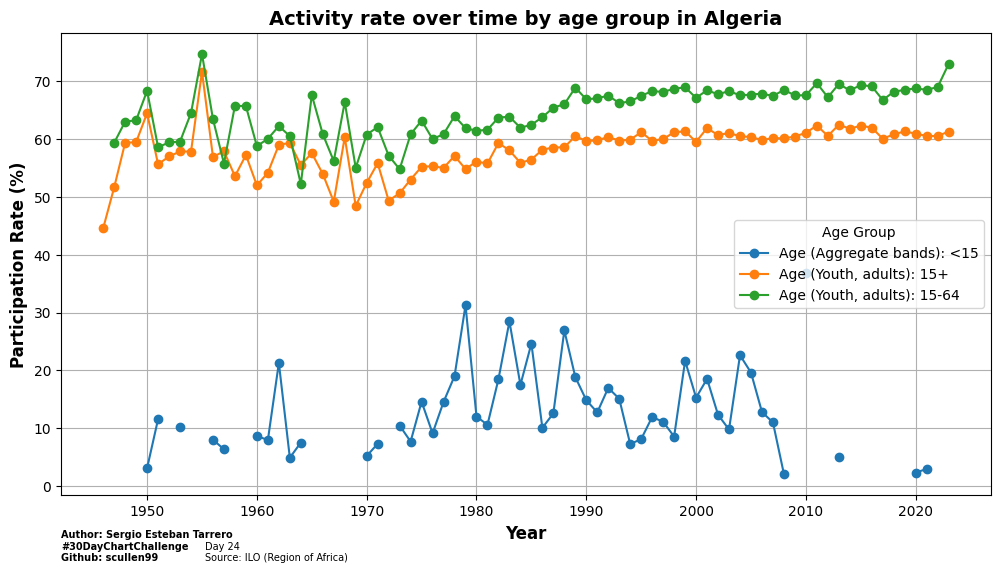

In [179]:
# Chart
plt.figure(figsize=(12, 6))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)

plt.title('Activity rate over time by age group in Algeria', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Participation Rate (%)', fontsize=12, fontweight='bold')
plt.legend(title='Age Group')
plt.grid(True)

plt.gcf().text(0.125, 0.0001, 'Author: Sergio Esteban Tarrero\n#30DayChartChallenge\nGithub: scullen99', fontsize=7, color='black', ha='left', fontweight='bold')
plt.gcf().text(0.245, 0.0001, 'Day 24\nSource: ILO (Region of Africa)', fontsize=7, color='black', ha='left')

plt.savefig('SergioEstebanTarreroDay24.png', dpi=300, bbox_inches='tight')

plt.show()